| 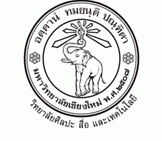 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name______Jinpasu____________Sawaka_________________________________      Student ID___________602110088____________________</b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [1]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [81]:
tel = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
tel.head()


In [82]:
tel.isnull().any()


In [83]:
tel_clean = tel

In [84]:
tel_clean['PaperlessBilling']


In [85]:
tel_clean.dtypes

In [86]:
tel_clean = tel_clean.drop(['PaperlessBilling'],axis = 1)
tel_clean

In [87]:
tel_clean['customerID'] = pd.factorize(tel_clean['customerID'])[0]
tel_clean['gender'] = pd.factorize(tel_clean['gender'])[0]
tel_clean['Partner'] = pd.factorize(tel_clean['Partner'])[0]
tel_clean['Dependents'] = pd.factorize(tel_clean['Dependents'])[0]
tel_clean['PhoneService'] = pd.factorize(tel_clean['PhoneService'])[0]
tel_clean['MultipleLines'] = pd.factorize(tel_clean['MultipleLines'])[0]
tel_clean['InternetService'] = pd.factorize(tel_clean['InternetService'])[0]
tel_clean['OnlineSecurity'] = pd.factorize(tel_clean['OnlineSecurity'])[0]
tel_clean['OnlineBackup'] = pd.factorize(tel_clean['OnlineBackup'])[0]
tel_clean['DeviceProtection'] = pd.factorize(tel_clean['DeviceProtection'])[0]
tel_clean['TechSupport'] = pd.factorize(tel_clean['TechSupport'])[0]
tel_clean['StreamingTV'] = pd.factorize(tel_clean['StreamingTV'])[0]
tel_clean['StreamingMovies'] = pd.factorize(tel_clean['StreamingMovies'])[0]
tel_clean['Contract'] = pd.factorize(tel_clean['Contract'])[0]
tel_clean['PaymentMethod'] = pd.factorize(tel_clean['PaymentMethod'])[0]
tel_clean['MonthlyCharges'] = pd.factorize(tel_clean['MonthlyCharges'])[0]
tel_clean['TotalCharges'] = pd.factorize(tel_clean['TotalCharges'])[0]
tel_clean['Churn'] = pd.factorize(tel_clean['Churn'])[0]


tel_clean


In [88]:
tel_clean.dtypes

In [121]:
X = tel_clean.drop('Churn', axis = 1)
y = tel_clean['Churn']

In [122]:
y

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [126]:
X_train.shape

In [127]:
X_test.shape

In [128]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA




params = {
    'n_estimators' : [10, 20, 50, 100, 200]
}
from sklearn.pipeline import Pipeline
clf = Pipeline([
  
  ('feature_reduction',  PCA(n_components = 2)),
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection',SelectFdr(f_classif, alpha=0.2)),
  ('classification', GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10))
])
clf.fit(X_train_norm, y_train)


In [130]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear')
clf.fit(X_train_norm, y_train)
yp = clf.predict(X_train_norm)
acc = sum(yp == y_train)/len(y_train)

print("train accuracy : "+str(acc))

In [131]:
yp = clf.predict(X_test_norm)
acc = sum(yp == y_test)/len(y_test)

print("test accuracy : "+str(acc))

#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [178]:
sp = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
sp_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
sp_test.head()

In [179]:
sp.dtypes

In [180]:
sp.isnull().any()

In [181]:
X = sp.drop([0],axis=1).values
y = sp[0].values

In [182]:
np.unique(y)

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [187]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [185]:
X_test.shape

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [189]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,500,1000)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA




params = {
    'n_estimators' : [10, 20, 50, 100, 200]
}
from sklearn.pipeline import Pipeline
clf = Pipeline([
  
  ('feature_reduction',  PCA(n_components = 400)),
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection',SelectFdr(f_classif, alpha=0.2)),
  ('classification', GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10))
])
clf.fit(X_train_norm, y_train)

In [191]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear')
clf.fit(X_train_norm, y_train)
yp = clf.predict(X_train_norm)
acc = sum(yp == y_train)/len(y_train)

print("train accuracy : "+str(acc))

In [192]:
yp = clf.predict(X_test_norm)
acc = sum(yp == y_test)/len(y_test)

print("test accuracy : "+str(acc))

In [193]:
Xb = sp_test.drop([0],axis=1).values 
yb = sp_test[0].values

In [195]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler.fit(X_train) 
X_blind_norm = scaler.transform(Xb)

In [196]:
yp = clf.predict(X_blind_norm)
acc = sum(yp == yb)/len(yb)

print("test accuracy : "+str(acc))

#### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [197]:
rw = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
rw.head()

In [198]:
rw.groupby("quality")["quality"].count()

In [199]:
rw_clean = rw.dropna(axis = 0)
rw_clean

In [253]:
rw_clean['pH'] = pd.factorize(rw['pH'])[0]
rw_clean['citric acid'] = pd.factorize(rw['citric acid'])[0]
rw_clean['fixed acidity'] = pd.factorize(rw['fixed acidity'])[0]

In [254]:
rw_clean.isnull().sum(axis=0)


In [306]:
X = rw_clean.drop(['quality'],axis=1).values
y = rw_clean['quality'].values

In [308]:
from sklearn.utils import shuffle
import numpy as np
X, y = shuffle(X, y)

In [309]:
y


In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [311]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [312]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [313]:
import tensorflow as tf

In [396]:
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dense(5, activation='relu'),
      tf.keras.layers.Dense(3, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')    
    ])
    return model

In [397]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(11,)))
model.add(layers.Activation('softmax'))

loss_fn = keras.losses.SparseCategoricalCrossentropy(),

model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])


In [399]:
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 500 , validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

In [453]:
import glob

filename = glob.glob("../input/food41/images/beet_salad/*.*")
filename[0] 

In [454]:
filename[0].split("_")

In [439]:
filename[0].split("_")[-1].split(".")[0] 

In [440]:
label = np.array([(item.split("_")[-1].split(".")[0]) for item in filename])

In [468]:
import glob
filename = glob.glob("../input/food41/images/apple_pie/*.*")
filename[0]

In [469]:
filename[0].split("_")

In [470]:
filename[0].split("_")[-1].split(".")[0] 

In [471]:
label = np.array([(item.split("_")[-1].split(".")[0]) for item in filename])

In [472]:
import shutil
for i in range(len(label)):
    if label[i] == 0:
        shutil.copy(filename[i], '/kaggle/working/train/apple_pie')
    else:
        shutil.copy(filename[i], '/kaggle/working/train/apple_pie')

In [441]:
!mkdir train
!mkdir train/apple_pie
!mkdir train/beet_salad

In [473]:
import shutil
for i in range(len(label)):
    if label[i] == 0:
        shutil.copy(filename[i], '/kaggle/working/train/apple_pie')
    else:
        shutil.copy(filename[i], '/kaggle/working/train/beet_salad')

In [443]:
!mkdir test
!mkdir test/apple_pie
!mkdir test/beet_salad

In [474]:
import glob
fileapple = np.array(glob.glob("./train/apple_pie/*.*"))
filebeet = np.array(glob.glob("./train/beet_salad/*.*"))

In [484]:
appleidx = np.random.randint(len(fileapple), size = 4)
beetidx = np.random.randint(len(filebeet), size = 2)

In [485]:
for i in appleidx:
    shutil.move(fileapple[i],'./test/apple_pie/')
for i in beetidx:
    shutil.move(filebeet[i],'./test/beet_salad/')

In [486]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.2,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False,   
        validation_split=0.2)

In [487]:
train_dir = './train'

batch_size = 5 # ส่งไปเทรนทีละ5 เพราะมีรูป ผญ 15 คน
img_height = 100
img_width  = 100
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [488]:
train_generator.class_indices

In [489]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() 
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = train_generator.image_shape)) 
    
    model.add(MaxPooling2D(pool_size = (2, 2)))
   
    
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
   
    
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(rate = 0.15))
    
    model.add(Flatten())
   
    
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [490]:
model = create_model()

In [492]:
fitted_model = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 5)

#### Q5. Create an object detection model to detect your own face in the picture. (Show me that the model can detect your face in a test image.)
<b><font color=red>The model must be able to detect your face to get full score.</font></b>

In [493]:
import albumentations as A
import matplotlib.pyplot as plt
import cv2

In [502]:
import glob
imgdir = "/kaggle/input/jinpasu-bdm-pic/602110088_jinpasu_pic/"
img_names = sorted(glob.glob(imgdir + "*.jpg"))
label_names = sorted(glob.glob(imgdir+ "*.txt"))


In [504]:
img_names + label_names

In [602]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White
def read_label(labelfile):
    content = open(labelfile).readlines()
    list_with_all_boxes = []
    list_names = []
    for item in content:
        classname, xcen, ycen, w, h = item.rstrip().split()
        list_with_single_boxes = [float(xcen),float(ycen),float(w),float(h)]
        list_with_all_boxes.append(list_with_single_boxes)
        list_names.append(int(classname))
    return list_names, list_with_all_boxes

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    imgSize = np.shape(img)
    xcen, ycen, w, h = bbox
    x_min = int(max(xcen - w/2, 0)*imgSize[1])
    x_max = int(min(xcen + w/2, 1)*imgSize[1])
    y_min = int(max(ycen - h/2, 0)*imgSize[0])
    y_max = int(min(ycen + h/2, 1)*imgSize[0])
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [603]:
from PIL import Image
category_id_to_name = {0: "Jinpasu"}
image = np.array(Image.open(img_names[3]))
class_labels, bboxes = read_label(label_names[4])
visualize(image, bboxes, class_labels, category_id_to_name)

In [547]:
#Function for Albumentation (Augamentation )
img_size = 416
train_transform = A.Compose([
    A.Resize(width=img_size, height=img_size), #resize to square size
    A.HorizontalFlip(p=0.5), #random horizontal flip 
    A.VerticalFlip(p=0.5), #random verizontal flip 
    A.ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=45, p=0.5), #บิดและย่อขยาย 0.25 หมุนได้ 45 องศา ความน่าจะเป็น 0.5
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5), #color
    A.RandomBrightnessContrast(p=0.5), #brighth
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3), #color 
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'], min_visibility=0.2))

In [548]:
#try train_transform function
transformed = train_transform(image=image, bboxes=bboxes, class_labels=class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']
visualize(transformed_image, transformed_bboxes, transformed_class_labels, category_id_to_name) #show

In [549]:
!mkdir Jinpasu_TRAIN

In [550]:

outdir = "./Jinpasu_TRAIN/"
for i in range(len(img_names)-10): 
    image = np.array(Image.open(img_names[i]))
    class_labels, bboxes = read_label(label_names[i])
    onlyname = img_names[i].split('/')[-1].split('.')[0]
    for ii in range(20): 
        transformed = train_transform(image=image, bboxes=bboxes, class_labels=class_labels)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        transformed_class_labels = transformed['class_labels']
        transformed_name = onlyname+'_'+str(ii)
        cv2.imwrite(outdir + transformed_name +'.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)) 
        out_file = open(outdir + transformed_name +'.txt', 'w')
        for iii in range(len(transformed_bboxes)):
            bIn  =  A.augmentations.bbox_utils.convert_bbox_to_albumentations(transformed_bboxes[iii], 'yolo', img_size, img_size, check_validity=True)
            bOut = A.augmentations.bbox_utils.convert_bbox_from_albumentations(bIn, 'yolo', img_size, img_size, check_validity=True)
            out_file.write(str(0) + " " + " ".join([str(b) for b in bOut]) + '\n')
        out_file.close()

In [551]:
!ls ./Jinpasu_TRAIN/* | wc -l #numbers of train images = 480 (images 240 + labels 240)

In [552]:
!ls ./Jinpasu_TRAIN/*

In [553]:
!mkdir Jinpasu_VAL 

In [554]:
#Augumentation validation images 
val_transform = A.Compose([
    A.Resize(width=img_size, height=img_size), #just resize to validation in model
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'], min_visibility=0.2))

In [565]:
#keep validation image to ROSE_VAL directory 
outdir = "./Jinpasu_VAL/"
for i in range(5, len(img_names)-3): #validation 6 images / Test 2 images
    image = cv2.imread(img_names[i])
    class_labels, bboxes = read_label(label_names[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    onlyname = img_names[i].split('/')[-1].split('.')[0]

    transformed = val_transform(image=image, bboxes=bboxes, class_labels=class_labels)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']
    transformed_class_labels = transformed['class_labels']
    transformed_name = onlyname
    cv2.imwrite(outdir + transformed_name +'.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)) 
    out_file = open(outdir + transformed_name +'.txt', 'w')
    for iii in range(len(transformed_bboxes)):
        bIn  =  A.augmentations.bbox_utils.convert_bbox_to_albumentations(transformed_bboxes[iii], 'yolo', img_size, img_size, check_validity=True)
        bOut = A.augmentations.bbox_utils.convert_bbox_from_albumentations(bIn, 'yolo', img_size, img_size, check_validity=True)
        out_file.write(str(0) + " " + " ".join([str(b) for b in bOut]) + '\n')
    out_file.close()

In [566]:
!ls ./Jinpasu_VAL/* | wc -l 

In [568]:
!ls ./Jinpasu_VAL/*

In [569]:
!mkdir Jinpasu_TEST

In [573]:
outdir = "./Jinpasu_TEST/"
for i in range(5, len(img_names)-3): #Test 2 images
    image = cv2.imread(img_names[i])
    class_labels, bboxes = read_label(label_names[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    onlyname = img_names[i].split('/')[-1].split('.')[0]

    transformed = val_transform(image=image, bboxes=bboxes, class_labels=class_labels)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']
    transformed_class_labels = transformed['class_labels']
    transformed_name = onlyname
    cv2.imwrite(outdir + transformed_name +'.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)) 
    out_file = open(outdir + transformed_name +'.txt', 'w')
    for iii in range(len(transformed_bboxes)):
        bIn  =  A.augmentations.bbox_utils.convert_bbox_to_albumentations(transformed_bboxes[iii], 'yolo', img_size, img_size, check_validity=True)
        bOut = A.augmentations.bbox_utils.convert_bbox_from_albumentations(bIn, 'yolo', img_size, img_size, check_validity=True)
        out_file.write(str(0) + " " + " ".join([str(b) for b in bOut]) + '\n')
    out_file.close()

In [574]:
!ls ./Jinpasu_TEST/* | wc -l 

In [577]:
import os


In [578]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
print(torch.__version__, torchvision.__version__)
os.getcwd()

In [579]:
!git clone https://github.com/ultralytics/yolov5.git #git clone command for download program

In [580]:
os.chdir("/kaggle/working/yolov5") #run at yolov5 directory
!pip install -r ./requirements.txt

In [581]:
os.chdir("/kaggle/working/yolov5") #run at yolov5 directory
#import train images from ROSE directory to train.txt
import glob
filename = glob.glob('/kaggle/working/Jinpasu_TRAIN/*.jpg')
filename.sort()
f = open("./train.txt", "w")
for name in filename:
    f.write(name+"\n")
f.close()

#import validation images from ROSE_VAL directory to val.txt
filename = glob.glob('/kaggle/working/Jinpasu_VAL/*.jpg')
filename.sort()
f = open("./val.txt", "w")
for name in filename:
    f.write(name+"\n")
f.close()

In [583]:
#create train directory
os.chdir("/kaggle/working/yolov5")
f = open("./train.yaml", "w")
f.write('train: ./train.txt'+"\n")
f.write('val: ./val.txt'+"\n")
f.write('nc: 1'+"\n")
f.write('names: [ \'Jinpasu\' ]'+"\n")
f.close()

In [584]:
!ls ./yolov5/*

In [585]:
!wandb disabled

# TRAIN

In [622]:
os.chdir("/kaggle/working/yolov5")
!python train.py --img 416 --batch 8 --epochs 20 --data train.yaml --cfg ./models/yolov5s.yaml --name JinpasuRUN 

In [616]:
#Train rate Graph 
os.chdir("/kaggle/working/yolov5")
from utils.plots import plot_results 
plot_results('runs/train/JinpasuRUN/results.csv')
image = np.array(Image.open('runs/train/JinpasuRUN/results.png'))
plt.figure(figsize=(20, 20))
plt.imshow(image)

In [617]:
os.chdir("/kaggle/working/yolov5")
from models.experimental import attempt_load
from utils.torch_utils import select_device
weights = './runs/train/JinpasuRUN/weights/best.pt' #select best model
device = select_device('cpu')
model = attempt_load(weights, map_location=device)  # load FP32 model
stride = int(model.stride.max())  # model stride
names = model.module.names if hasattr(model, 'module') else model.names  # get class names

In [618]:
!ls /kaggle/working/Jinpasu_VAL/*

In [619]:
os.chdir("/kaggle/working/yolov5")
from utils.datasets import LoadImages
from utils.general import check_img_size, non_max_suppression, scale_coords
from utils.plots import Annotator, colors
h = 416
w = 416
imgsz = check_img_size([h,w], s=stride) 
dataset = LoadImages('/kaggle/working/Jinpasu_VAL/jps_3.jpg', img_size=imgsz, stride=stride, auto=True)

pred_results = []
for path, img, im0s, vid_cap in dataset:
    img = torch.from_numpy(img).to(device)
    img = img / 255.0
    if len(img.shape) == 3:
        img = img[None]
    pred = model(img)[0]
    pred = non_max_suppression(pred, 0.1, 0.45, None, False, max_det=1000)
    bboxes = []
    labels = []
    confs = []
    for i, det in enumerate(pred):
        if len(det):
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0s.shape).round()
            for *xyxy, conf, cls in reversed(det):
                labels.append(int(cls))
                confs.append(conf.item())
                xmin, ymin, xmax, ymax = xyxy
                xcen = (xmin + xmax) / 2 / w;
                ycen = (ymin + ymax) / 2 / h;
                ww = (xmax - xmin) / w;
                hh = (ymax - ymin) / h;
                bboxes.append([xcen.item(), ycen.item(), ww.item(), hh.item()])
    pred_results.append([path, bboxes, labels, confs])

In [620]:
path, bboxes, labels, confs = pred_results[0]
image = np.array(Image.open(path))
visualize(image, bboxes, labels, names) 

In [621]:
pred_results